### 抓取2017年北京天气质量数据

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
def getData(text):
    obj = BeautifulSoup(req.text, 'html5lib')
    div = obj.find('div', class_="api_month_list")
    listtr = div.find_all('tr')
    for tr in listtr[1:]:
        listairData.append(list(tr.stripped_strings))

In [3]:
listairData = []
baseurl = 'http://www.tianqihoubao.com/aqi/beijing-%d%02d.html'
year = 2017
for m in range(1, 13):
    url = baseurl%(year, m)
    req = requests.get(url)
    if req.status_code == 200:
        getData(req.text)

### matplotlib AQI

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = np.array(listairData)
aqi_data = data[:, 2].astype('i4')

In [6]:
aqi_data.dtype

dtype('int32')

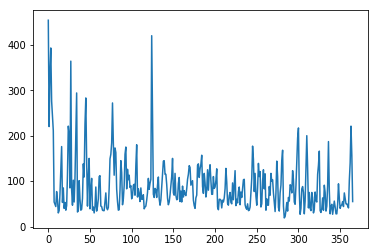

In [7]:
plt.plot(aqi_data)

### X轴设置时间值（2017-01,2017-02....2017-12）

In [8]:
import calendar

In [9]:
help(calendar.monthrange)

Help on function monthrange in module calendar:

monthrange(year, month)
    Return weekday (0-6 ~ Mon-Sun) and number of days (28-31) for
    year, month.



In [11]:
daysm = []
for m in range(1, 13):
    daysm.append(calendar.monthrange(2017,m))

In [12]:
daysm

[(6, 31),
 (2, 28),
 (2, 31),
 (5, 30),
 (0, 31),
 (3, 30),
 (5, 31),
 (1, 31),
 (4, 30),
 (6, 31),
 (2, 30),
 (4, 31)]

In [14]:
daysm = np.array(daysm, dtype=({'names':['weekday', 'dnums'], 'formats':['i4', 'i4']}))

In [15]:
daysm

array([(6, 31), (2, 28), (2, 31), (5, 30), (0, 31), (3, 30), (5, 31),
       (1, 31), (4, 30), (6, 31), (2, 30), (4, 31)],
      dtype=[('weekday', '<i4'), ('dnums', '<i4')])

In [17]:
ds = daysm['dnums']

In [18]:
ds

array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31], dtype=int32)

In [20]:
a_days = np.insert(ds, 0, values=0)  # 插入数据

In [21]:
a_days

array([ 0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31], dtype=int32)

In [22]:
tmp = np.cumsum(a_days)

In [23]:
tmp

array([  0,  31,  59,  90, 120, 151, 181, 212, 243, 273, 304, 334, 365])

In [26]:
months = np.arange(np.datetime64('2017'), np.datetime64('2018'), dtype='datetime64[M]')

In [28]:
months = months.astype('U10')

In [29]:
months

array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='<U10')

([<matplotlib.axis.XTick at 0x115c40a58>,
 <a list of 12 Text xticklabel objects>)

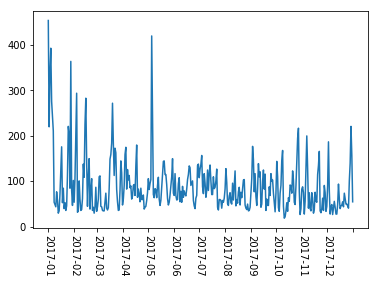

In [31]:
plt.plot(aqi_data)
plt.xticks(tmp, months, rotation = 270)

### 单月AQI线性图

In [33]:
aqidata = np.array(listairData)

In [37]:
dataData = aqidata[:,0].astype('datetime64[M]')
jan = np.datetime64('2017-01')  # 生成1月datetime
index = np.where(dataData==jan)  # 1月索引
jan_data = aqidata[index]  # 1月所有数据
d = jan_data[:, 2]  # aqi数据
plt.plot(d.astype('i4'))  # 绘制图标

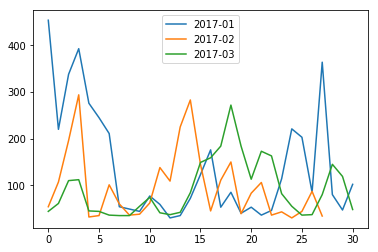

In [53]:
months = np.arange(np.datetime64('2017-01'), np.datetime64('2017-04'), dtype='datetime64[M]')
for x in months:
    index = np.where(dataData == x)  # 索引
    aqi_x_data = aqidata[index]  # 所有数据
    d = aqi_x_data[:, 2]  # aqi数据
    plt.plot(d.astype('i4'))  # 绘制图标
    plt.legend(months.astype('U10'))

In [54]:
months = np.arange(np.datetime64('2017'), np.datetime64('2018'), dtype='datetime64[M]')
months

array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='datetime64[M]')

In [55]:
months = months.reshape(4, 3)
months

array([['2017-01', '2017-02', '2017-03'],
       ['2017-04', '2017-05', '2017-06'],
       ['2017-07', '2017-08', '2017-09'],
       ['2017-10', '2017-11', '2017-12']], dtype='datetime64[M]')

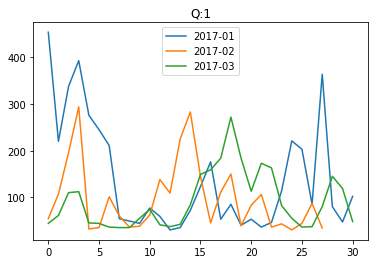

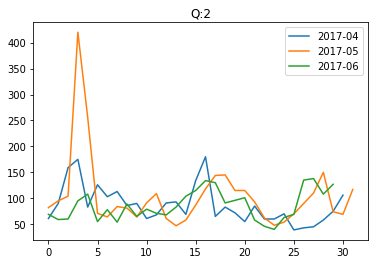

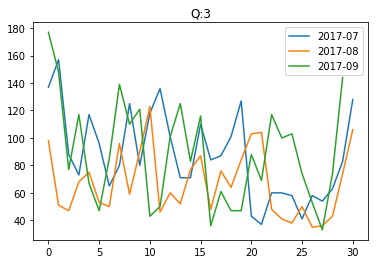

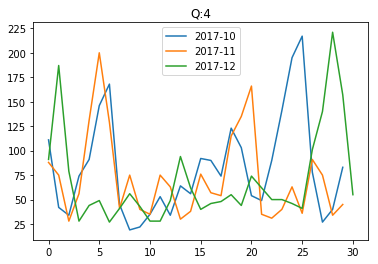

In [63]:
findex = 1
for q in months:
    plt.figure(findex)
    for m in q:
        index = np.where(dataData == m)  # 索引
        aqi_m_data = aqidata[index]  # 所有数据
        d = aqi_m_data[:, 2]  # aqi数据
        plt.plot(d.astype('i4'))  # 绘制图标
    plt.legend(q.astype('U10'))
    plt.title('Q:%d'%findex)
    findex += 1 

In [64]:
x = [1,2,3,4]
y1 = [10, 23, 34,21]
y2 = [9,10,11,4]

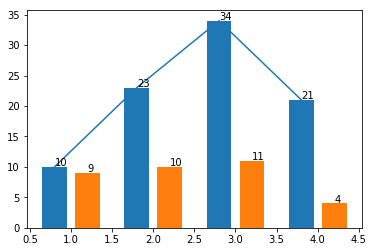

In [82]:
plt.bar(np.array(x)-0.2, y1, width=0.3)
plt.bar(np.array(x)+0.2, y2, width=0.3)
for px, py in zip(x, y1):
    plt.text(px-0.2, py+0.2, '%s'%py)
for px, py in zip(x, y2):
    plt.text(px+0.2, py+0.2, '%s'%py)
plt.plot(np.array(x)-0.2, y1)

<BarContainer object of 4 artists>

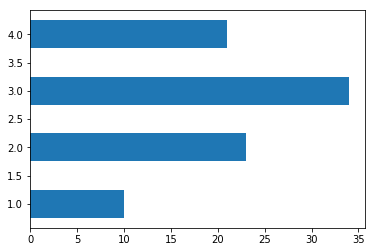

In [68]:
plt.barh(x, y1, height=0.5)

In [83]:
nums = 40
scores = np.random.randint(30, 101, nums)
scores

array([50, 82, 96, 35, 94, 77, 48, 96, 96, 42, 33, 85, 63, 51, 38, 41, 66,
       41, 34, 33, 85, 54, 33, 32, 35, 76, 83, 49, 37, 96, 49, 35, 43, 53,
       49, 75, 80, 74, 85, 80])

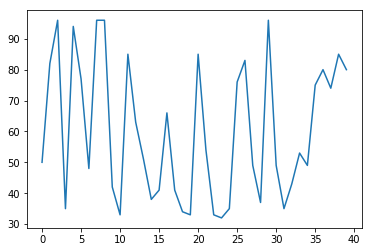

In [84]:
plt.plot(scores)

In [89]:
levels = [(0,60), (60,80), (80,90), (90,100)]
level_nums = []
for start, stop in levels:
    indexs = np.where((scores>=start)&(scores<stop))
    valus = scores[indexs]
    level_nums.append(len(valus))

In [91]:
xvals = []
for start, stop in levels:
    xvals.append('%s-%s'%(start, stop))
xvals

['0-60', '60-80', '80-90', '90-100']

([<matplotlib.axis.XTick at 0x117b82cc0>,
 <a list of 4 Text xticklabel objects>)

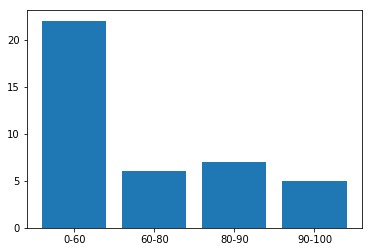

In [95]:
plt.bar(range(4), level_nums)
plt.xticks(range(4), xvals)

In [97]:
#  空气质量等级划分
levels = [(0,50), (50,100), (100,200), (200,300), (300,5000)]
# x轴的值
xindex = []
for level in levels:
    xindex.append('%s-%s'%(level[0], level[1]))
print(xindex)

['0-50', '50-100', '100-200', '200-300', '300-5000']


In [98]:
# PM2.5等级对应天数
nums = []
# PM2.5数据
pm25 = data[:, 4].astype('i4')
for s, e in levels:
    index = np.where((pm25>=s)&(pm25<e), True, False)
    d = pm25[index]
    nums.append(len(d))

In [99]:
nums

[209, 111, 37, 5, 4]

Text(0.5, 1.0, '2017 PM2.5')

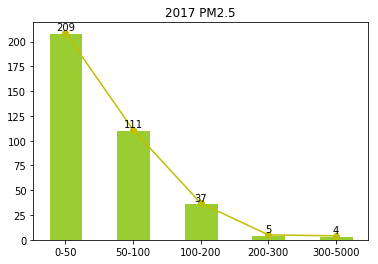

In [118]:
xvalus = np.arange(len(nums))
plt.bar(xvalus, nums, width=0.5, facecolor='yellowgreen', edgecolor='white')
# 设置x轴数值
plt.xticks(xvalus, xindex)
for x,y in zip(xvalus, nums):
    plt.text(x,y+0.3, '%d'%y, ha='center', va= 'bottom')  # 显示数据
# 添加曲线图
plt.plot(nums, '-oy')
plt.title('2017 PM2.5')

In [120]:
# 每个月空气等级AQI对应表，等级：0-100， 100-200， 200+
listlevel = []
# 时间index
dateindex = data[:, 0].astype('datetime64[M]')
# 每个月遍历
for m in np.arange(np.datetime64('2017'), np.datetime64('2018'), dtype = 'datetime64[M]'):
    # 每月等级值
    tmp = []
    # 对应月索引
    index = np.where((dateindex == m))
    m_data = data[index]
    # 获取对应月值
    aqi_m_data = m_data[:, 2].astype('i4')
    # 0~100天数
    goodd = np.sum(aqi_m_data<100)
    tmp.append(goodd)
    # 200+天数
    badd = np.sum(aqi_m_data>200)
    tmp.append(badd)
    # 100~200天数
    midd = len(aqi_m_data)-sum(tmp)
    tmp.insert(1, midd)
    # 添加总列表
    listlevel.append(tuple(tmp))
listlevel

[(17, 4, 10),
 (16, 9, 3),
 (19, 11, 1),
 (23, 8, 0),
 (20, 10, 2),
 (20, 10, 0),
 (20, 11, 0),
 (27, 4, 0),
 (17, 13, 0),
 (22, 7, 1),
 (24, 6, 0),
 (26, 4, 1)]

good [17 16 19 23 20 20 20 27 17 22 24 26]
midd [ 4  9 11  8 10 10 11  4 13  7  6  4]
bad [10  3  1  0  2  0  0  0  0  1  0  1]


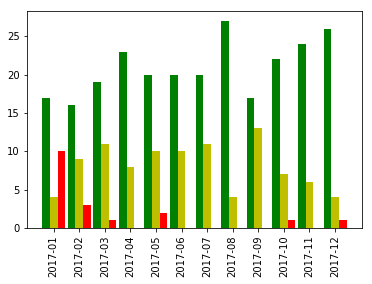

In [122]:
# 每个月空气质量天数分布
levels = np.array(listlevel, dtype=({'names':('good', 'midd', 'bad'), 'formats':('i4', 'i4', 'i4')}))
# bar总宽度与bar数值
total_width, n = 0.9, 3
width = total_width/n
# bar对应颜色
colors = {'good':'g', 'midd':'y', 'bad':'r'}
for index, tag in enumerate(['good', 'midd', 'bad']):
    # 获取等级对应天数
    aqidata = levels[tag]
    print(tag, aqidata)
    # 柱状图
    plt.bar((np.array(range(12))-width)+width*index,aqidata, width=width, fc=colors[tag])
# x轴显示值
xt = np.arange(np.datetime64('2017'), np.datetime64('2018'), dtype='datetime64[M]').astype('U10')
c = plt.xticks(range(12), xt, rotation=90)

In [5]:
data = [30, 40, 20, 10]
labels = ['0-60', '60-80', '80-90', '90-100']

([<matplotlib.patches.Wedge at 0x106c321d0>,
 [Text(0.5877852219942177, 0.8090170163879176, '0-60'),
  Text(-0.9999999999999957, -9.362675689150002e-08, '60-80'),
  Text(0.30901711013258343, -0.9510564786832099, '80-90'),
  Text(0.9510565582469205, -0.3090168652606553, '90-100')],
 [Text(0.3526711331965306, 0.4854102098327505, '30.0%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '40.0%'),
  Text(0.18541026607955005, -0.5706338872099259, '20.0%'),
  Text(0.5706339349481523, -0.1854101191563932, '10.0%')])

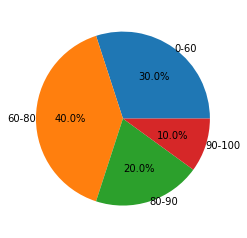

In [12]:
plt.pie(data, labels=labels, autopct='%2.1f%%', labeldistance=1)

In [8]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : array-like
        The wedge sizes.
    
    explode : array-like, optional, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list,